<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Multialternative-Dynamic-Decision-Process" data-toc-modified-id="Multialternative-Dynamic-Decision-Process-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Multialternative Dynamic Decision Process</a></span><ul class="toc-item"><li><span><a href="#Valences-$\vec-V(t)$" data-toc-modified-id="Valences-$\vec-V(t)$-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Valences $\vec V(t)$</a></span><ul class="toc-item"><li><span><a href="#Personal-Evaluation" data-toc-modified-id="Personal-Evaluation-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Personal Evaluation</a></span></li><li><span><a href="#Attention-Weight" data-toc-modified-id="Attention-Weight-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Attention Weight</a></span></li><li><span><a href="#Comparison-Process" data-toc-modified-id="Comparison-Process-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Comparison Process</a></span></li></ul></li><li><span><a href="#Preferences-$\vec-P(t)$" data-toc-modified-id="Preferences-$\vec-P(t)$-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Preferences $\vec P(t)$</a></span></li><li><span><a href="#Initial-Preference-State-$\vec-P(0)$" data-toc-modified-id="Initial-Preference-State-$\vec-P(0)$-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Initial Preference State $\vec P(0)$</a></span></li><li><span><a href="#Feedback-Matrix-$\vec-S$" data-toc-modified-id="Feedback-Matrix-$\vec-S$-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Feedback Matrix $\vec S$</a></span></li><li><span><a href="#Parameter-Summary" data-toc-modified-id="Parameter-Summary-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Parameter Summary</a></span></li></ul></li><li><span><a href="#MADFT-vs.-Other-Models" data-toc-modified-id="MADFT-vs.-Other-Models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MADFT vs. Other Models</a></span><ul class="toc-item"><li><span><a href="#Multiattribute-Utility-Model" data-toc-modified-id="Multiattribute-Utility-Model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Multiattribute Utility Model</a></span></li><li><span><a href="#Dynamic-Thurstone-Model" data-toc-modified-id="Dynamic-Thurstone-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dynamic Thurstone Model</a></span></li></ul></li><li><span><a href="#MADFT-IMPLEMENTATION" data-toc-modified-id="MADFT-IMPLEMENTATION-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MADFT IMPLEMENTATION</a></span></li></ul></div>

---

By: Daniel J Wilson
Date: March 21, 2018

Adapted from [Roe et al. 2001](https://www.ncbi.nlm.nih.gov/pubmed/11381834)

---

In [1]:
import numpy as np
import pandas as pd
import random as random
import matplotlib.pyplot as plt
import math

# Multialternative Dynamic Decision Process

---

* Sequential Sampling Model
* Extends application of earlier models to multialternative preferential choice

## Valences $\vec V(t)$

---

At any moment in time, each alternative in the choice set is associated with a valence value

---

The valence of option *i* at time *t* is written as:

$$v_i(t)$$

This represents the **value** of option *i* at time *t*.

---

The ordered set of **valences** for all options is written as:

$$\vec V$$

---

**EXAMPLE**

Three alternatives, A, B and C = set {A, B, C}

This would be represented by the vector:

$$\vec V (t) = [v_a(t), v_b(t), v_c(t)]'$$

---

**Valence** of each **option** consists of THREE components:

1. Personal evaluation

2. Attention weight

3. Comparison Process

### Personal Evaluation

---

Subjective value of a given attribute on a single option

---

$$m_{ij}$$

Where $m_{ij}$ denotes the subjective value of **option** $i$ on **attribute** $j$

---

**EXAMPLE**

Three cars (options): $\vec M = [m_A, m_B, m_C]'$ 

Being considered on the attributes of:

ECONOMY: $\vec M_E = [m_{AE}, m_{BE}, m_{CE}]'$

QUALITY: $\vec Q_E = [m_{AQ}, m_{BQ}, m_{CQ}]'$

---

In [2]:
# Create Dataframe with example options

cars = np.array([['', 'Economy', 'Quality'],
                ['Car_A', 2, 9],
                ['Car_B', 3, 7],
                ['Car_C', 8, 4],
                ])

M = (pd.DataFrame(data=cars[1:,1:],
                  index=cars[1:,0],
                  columns=cars[0,1:]))

# make sure things are numeric for later
M.Economy = pd.to_numeric(M.Economy)
M.Quality = pd.to_numeric(M.Quality)

---

**PERSONAL EVALUATION VECTOR**

These vectors join to produce a 3 x 2 value matrix:

$$\vec M = [\vec M_E|\vec M_Q]$$

---

In [3]:
# View Dataframe/matrix

M

,Economy,Quality
Car_A,2,9
Car_B,3,7
Car_C,8,4


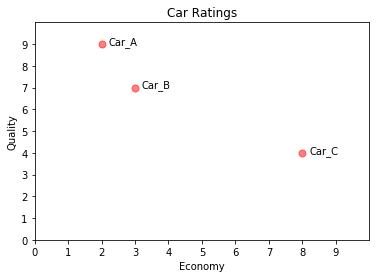

In [4]:
# Plot Cars Dataframe (M)

fig, ax = plt.subplots()
plt.scatter(M.Economy, M.Quality, s=50, c='red', alpha=0.5)

for i in range(M.shape[0]):
    plt.text(M.Economy[i]+0.2, M.Quality[i], str(M.index[i]))
    
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0,10,1))
ax.set_xlabel('Economy')

ax.set_ylim(0, 10)
ax.set_yticks(np.arange(0,10,1))
ax.set_ylabel('Quality')

ax.set_title('Car Ratings')

#ax.grid(True)
plt.show()

### Attention Weight

---

Attention given to each attribute (can vary from moment to moment)

---

$$W_{j}$$

Where $W_{j}(t)$ denotes the meomentary attention on **attribute** $j$ at **time** $t$.

---

**QUESTION**

Why not:

$$w_{ij}(t)$$

Where $w_{ij}(t)$ denotes the momentary attention of **option** $i$ on **attribute** $j$ at **time** $t$?

---

**ASSUMPTION**

Attention shifts in an all or nothing manner from one attribute at one moment:

$$W_Q(t) = 1, W_E(t) = 0$$

to another attribute at another moment:

$$W_Q(t) = 0, W_E(t) = 1$$

---

**ATTENTION PROBABILITY**

In the car example the probability of attending to the *economy* attribute is: $w_E$

The probability of attending to the *quality* attribute is: $w_Q$

---

**ATTENTION WEIGHT VECTOR**

Attention weights for all attributes at a given time make a **weight vector**:

$$\vec W(t)$$

In the car example the weight vector is two-dimensional:

$$\vec W(t) = [W_E(t)W_Q(t)]'$$

---

In [5]:
# Lets create some arbitrary weights then...

# Economy weight for 10 time points
W_E = np.random.randint(2, size=(10))

# Quality weight for 10 time points
W_Q = abs(W_E - 1)

# Create a numpy array from these two vectors
weights = np.array([W_E, W_Q]).T

# Convert the array into a pandas Dataframe
W = (pd.DataFrame(data=weights,
                           columns = ['Economy', 'Quality']
                          ))

# Take a look (this will be different every time you run it due to the random function)
W

,Economy,Quality
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
6,0,1
7,1,0
8,1,0
9,1,0


In [6]:
# Lets look at the weighted attribute values for each car at time point 3

# Set timepoint of interest
t = 3

# Create array of weights
W_t = np.ones((3,2), dtype = int) * np.array([W.iloc[t]])

# Convert the array into a pandas Dataframe (this is not necessary, just a bit easier to interpret)
W_t = (pd.DataFrame(data=W_t,
                    columns = ['Economy', 'Quality'],
                    index = ['Car_A', 'Car_B', 'Car_C']
                          ))

# Take a look at this Dataframe
W_t

,Economy,Quality
Car_A,1,0
Car_B,1,0
Car_C,1,0


---

**WEIGHTED VALUE**

The weighted value is the matrix product of weights and values:

$$\vec M\vec W(t)$$


---

**EXAMPLE**

When choosing among three cars, the $i$th row is:

$$\vec M\vec W(t) = W_E(t)m_{iE} + W_Q(t)m_{iQ}$$

---

In [7]:
# For t = 3

print('MW(t) = \n{0}\n'.format(M * W.iloc[3]))

# which is the same as:

print('WE(t)miE + WQ(t)miQ = \n{0}\n'.format(W.Economy[3]*M.Economy + W.Quality[3]*M.Quality))


MW(t) = 
       Economy  Quality
Car_A        2        0
Car_B        3        0
Car_C        8        0

WE(t)miE + WQ(t)miQ = 
Car_A    2
Car_B    3
Car_C    8
dtype: int64



In [8]:
# A bit more legibly, where W_t has been set to W(t) = W(3) above:

M_Wt = M * W_t
M_Wt

,Economy,Quality
Car_A,2,0
Car_B,3,0
Car_C,8,0


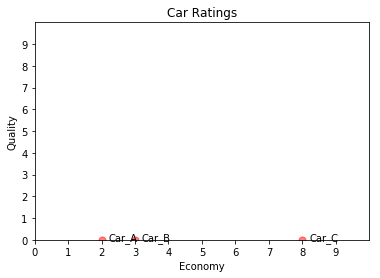

In [9]:
# Plot Cars Dataframe (M) Weighted by attention at time t = 3

fig, ax = plt.subplots()
plt.scatter(M_Wt.Economy, M_Wt.Quality, s=50, c='red', alpha=0.5)

for i in range(M_Wt.shape[0]):
    plt.text(M_Wt.Economy[i]+0.2, M_Wt.Quality[i], str(M_Wt.index[i]))
    
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0,10,1))
ax.set_xlabel('Economy')

ax.set_ylim(0, 10)
ax.set_yticks(np.arange(0,10,1))
ax.set_ylabel('Quality')

ax.set_title('Car Ratings')

#ax.grid(True)
plt.show()

---

**NOTE**

Unlike the classic weighted utility model, the weighted values are **stochastic** because of fluctuations in the attention weights (in this example $W_E(t)$ and $W_Q(t)$

---

### Comparison Process

---

Contrasts the weighted evaluations of each option

---

**GENERAL CONCEPT**

Valence of each option is produced by contrasting the weighted value of one alternative against the average of all the others.

---

**EXAMPLE**

Three alternatives (cars): {A, B, C}

Valence for option A:

$$v_A(t) = W_E(t)m_{AE} + W_Q(t)m_{AQ} - [W_E(t)m_{BE} + W_Q(t)m_{BQ} + W_E(t)m_{CE} + W_Q(t)m_{CQ}]/2$$

---

In [10]:
W.Quality[3]*M.Quality['Car_A']

0

In [11]:
# Using the values from 1.1.2 lets calculate this for t = 3 (change 't' to see other values)
t = 3

Val_A_t = W.Economy[t]*M.Economy['Car_A'] + W.Quality[t]*M.Quality['Car_A'] \
           - (W.Economy[t]*M.Economy['Car_B'] + W.Quality[t]*M.Quality['Car_B'] +
              W.Economy[t]*M.Economy['Car_C'] + W.Quality[t]*M.Quality['Car_C'])/2

print('Valence for Car A at time {0} = {1}'.format(t, Val_A_t))

Valence for Car A at time 3 = -3.5


---
**CONTRAST MATRIX**

$$\vec C= \begin{bmatrix}
    1 & -\frac{1}{2} & -\frac{1}{2}\\
    -\frac{1}{2} & 1 & -\frac{1}{2}\\
    -\frac{1}{2} & -\frac{1}{2} & 1
\end{bmatrix}$$

---

**VALENCE VECTOR**

$$\vec V(t) = \vec C\vec M\vec W(t)$$

This equation can be used for ***any*** number of *alternatives* and *attributes*.

---

In [12]:
# Lets try this

# First create the matrix C

C = np.array([[1, -0.5, -0.5], [-0.5, 1, -0.5], [-0.5, -0.5, 1]])
C

array([[ 1. , -0.5, -0.5],
       [-0.5,  1. , -0.5],
       [-0.5, -0.5,  1. ]])

In [13]:
# Then write the matrix product equation

# Change 't' value if you like
t = 3

# V(t) = CMW(t)
V_t = C.dot(M).dot(W.iloc[t])

print('Valence vector = \n{0}\n'.format(V_t))
print('In other words:\nCar A Valence at t={0} is {1}\nCar B Valence at t={0} is {2}\nCar C Valence at t={0} is {3}\n'.format(t, V_t[0], V_t[1], V_t[2]))

Valence vector = 
[-3.5 -2.   5.5]

In other words:
Car A Valence at t=3 is -3.5
Car B Valence at t=3 is -2.0
Car C Valence at t=3 is 5.5



---

**NOISE**

The authors assume that most choices often involve **primary** and **secondary** (irrelevant) attributes.

Under this assumption they divide a $p$-dimensional attention weight vector into two components:

$$\vec W(t)' = [\vec W_1(t)', \vec W_2(t)']$$ 

$\vec W_1(t)$ = **primary** dimensions/attributes ($q$-dimensional)

$\vec W_2(t)$ = **secondary/irrelevant** dimensions/attributes ($p-q$-dimensional)

This means the **Valence Vector** can be rewritten to:

$$\vec V(t) = \vec C\vec M\vec W(t) = \vec C\vec M_1\vec W_1(t) + \epsilon(t)$$

$\epsilon(t) = \vec C\vec M_2\vec W_2(t)$ and can be treated as a **stochastic error** or **residual** term.

---

## Preferences $\vec P(t)$

---

At any moment in time, each alternative in the choice set is associated with a preference strength

---

$P_i(t)$ = Preference strength for alternative $i$ at time $t$

Represents the **integration** of all **valences** considered for alternative $i$ up to that point in time.

---

$\vec P(t)$ = Preference state vector

Represents the preference for all alternatives at time $t$.

---

**EXAMPLE**

For three options, {A, B, C}

$$\vec P(t) = [P_A(T), P_B(t), P_C(t)]'$$

---

For time $t + 1$:

$$\vec P(t + 1) = \vec P(t) + \vec V(t)$$  

Where $\vec V(t)$ = **new** input valence vector

---

**EQUATION**: **Linear Stochastic Difference Equation**

$$\vec P(t+1) = \vec S\vec P(t) + \vec V(t+1)$$

Note that the new preference state $\vec P(t+1)$ is a **weighted combination** of:

*Previous preference state + New input valence*

---

The **dynamic** behavior of the model is determined by two factors.

1. $\vec P(0)$ = initial preference state
2. $\vec S$ = feedback matrix

---

## Initial Preference State $\vec P(0)$

---

Residual bias from previous experience (if present)

---

Initial **UNBIASED** state:

$$\vec P(0) = 0$$

---

## Feedback Matrix $\vec S$

---

Contains the self-connections and interconnections among the choice alternatives

---

**DIAGONAL ELEMENTS of $\vec S$: Self Feedback**

$$S_{ii}$$

Determine the **memory** of the previous preference state for an alternative

Allow for **growth** and **decay** of alternative's valence

---

**Special Cases**:

$S_{ii} = 0$

Option has **no memory** of its previous state.

$S_{ii} = 1$

Option has **perfect memory** of its previous state.

---

**Note**:

We will assume $S_{ii}$ is the same for all $i$.

---

**OFF-DIAGONAL ELEMENTS of $\vec S$: Interconnections**

$$S_{ij} \text{  for  } i \ne j$$

Usually **negative** values (inhibitory)

---

**Special Case**:

$S_{ij} = 0$

No inhibition.

---

**BASIC IDEA**

Strength of lateral interconnection between options = decreasing function of distance (in multiattribute space)

---

$$d_{ij}$$

Psychological distance between options $i$ and $j$ in multiattribute preference space.

---

**Interconnection Value**

$$S_{ij} = F[d(A_i, A_j)]$$

Where $F$ is a decreasing function.

Note that this function ($F$) could be of different forms (e.g. exponential [Shepard, 1964](https://www.sciencedirect.com/science/article/pii/0022249664900173)

---

**Important Constraints**

1. Symmetry: $S_{ij} = S_{ji}$

2. Interconnection value decreases with distance

---

In [14]:
# Just for fun let's check the distance between our three cars
CarA_CarB = math.hypot(M.Economy[0] - M.Economy[1], M.Quality[0] - M.Quality[1])
CarA_CarC = math.hypot(M.Economy[0] - M.Economy[2], M.Quality[0] - M.Quality[2])
CarB_CarC = math.hypot(M.Economy[1] - M.Economy[2], M.Quality[1] - M.Quality[2])

print('Distance between Car A and Car B = {0:.2f}'.format(CarA_CarB))
print('Distance between Car A and Car C = {0:.2f}'.format(CarA_CarC))
print('Distance between Car B and Car C = {0:.2f}'.format(CarB_CarC))

Distance between Car A and Car B = 2.24
Distance between Car A and Car C = 7.81
Distance between Car B and Car C = 5.83


---

**NOTE**

In this example the feedback matrix can produce at most three new parameters:

1. Self-feedback
2. A to B Inhibition
3. A to C Inhibition

## Parameter Summary

---

Four sets of parameters that require specification

---

$\vec w$

Mean weight matrix

---

$\vec M$

Value matrix

---

$\epsilon$

Residual variance contributed by irrelevant attributes

---

$\vec S$

Symmetric feedback matrix

---

# MADFT vs. Other Models

---

Showing how other models are just special cases of MADFT

## Multiattribute Utility Model 
([Keeney & Raiffa, 1976](https://www.amazon.com/Decisions-Multiple-Objectives-Preferences-Tradeoffs/dp/0521438837))

---

Requires two assumptions

---

**ASSUMPTION 1**

---

Remembering the **Linear Stochastic Difference Equation**

$$\vec P(t+1) = \vec S\vec P(t) + \vec V(t+1)$$

---

**IF** the feedback matrix is **zero** ($\vec S = 0$), then:

$$\vec P(t) = \vec V(t)$$

---

**ASSUMPTION 2**

---

Remember the **Valence Vector Equation**

$$\vec V(t) = \vec C\vec M_1\vec W_1(t) + \epsilon(t)$$

Where $\epsilon(t)$ represents irrelevant attributes/dimensions of the choice ($\vec C\vec M_2\vec W_2(t)$), and can be treated as stochastic error/residuals.

----

**IF** attention does not fluctuate across time **and** the residuals/error is zero ($\epsilon(t) = 0$) then:

$$\vec V = \vec C\vec M\vec w$$

Where $\vec V$ produces the same RANK ORDER over alternatives as the classic multi-attribute model.

---

## Dynamic Thurstone Model 
([Thurstone, 1959](https://www.amazon.ca/Measurement-Values-Louis-Leon-Thurstone/dp/0226801128))

---

*Need to learn how Thurstone preference model works*

---

**ASSUMPTIONS**

1. small step size ($t$)
2. Feedback matrix ($\vec S$) set to an identity matrix

---

Under these conditions at any fixsed time point $t$, $\vec P(t+1) = \vec S\vec P(t) + \vec V(t+1)$ reduces to a multivariate Thurstone preferential choice model.


# MADFT IMPLEMENTATION

---

Coding the model

---

**Create a value matrix for three cars: $\vec M$**

---

The left column is economy, the right, quality.

Each row is a car (A, S and B).


In [69]:
M_1 = np.array([[1,3], [.85,3.2], [3,1]])
M_1

array([[ 1.  ,  3.  ],
       [ 0.85,  3.2 ],
       [ 3.  ,  1.  ]])

In [70]:
options = ["A", "S", "B"]

M_1 = (pd.DataFrame(data=M_1,
                  columns=['Economy', 'Quality']))
M_1

,Economy,Quality
0,1.00,3.0
1,0.85,3.2
2,3.00,1.0


In [71]:
M_1['Car'] = options
M_1.set_index('Car', inplace=True)
M_1

,Economy,Quality
Car,,
A,1.00,3.0
S,0.85,3.2
B,3.00,1.0


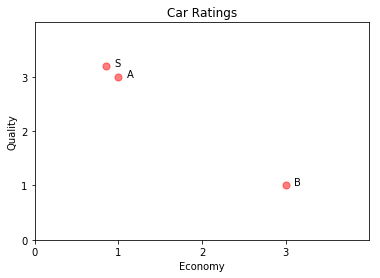

In [72]:
# Plot M

fig, ax = plt.subplots()
plt.scatter(M_1.Economy, M_1.Quality, s=50, c='red', alpha=0.5)

for i in range(len(M_1.index)):
    plt.text(M_1.Economy[i]+0.1, M_1.Quality[i], str(M_1.index[i]))
    
ax.set_xlim(0, 4)
ax.set_xticks(np.arange(0,4,1))
ax.set_xlabel('Economy')

ax.set_ylim(0, 4)
ax.set_yticks(np.arange(0,4,1))
ax.set_ylabel('Quality')

ax.set_title('Car Ratings')

#ax.grid(True)
plt.show()

---

**Set the attention weights: $\vec w$**

---

In this case for quality ($w_Q$) and economy ($w_E$).

Note that the weights are arbitrary in this case, and do not add up to 1 because some small residual probability is allowed for attention to irrelevant attributes.

In [126]:
w_q = 0.45
w_e = 0.43

# Make a vector of weights (add in the noise weight too)

w_vec = np.array([w_q, w_e, (1-w_q-w_e)])
w_vec

array([ 0.45,  0.43,  0.12])

---

**Create the feedback matrix: $\vec S$**

---

*Self* connections ($S_{ii}$) = 0.94 

*Inhibitory* connections between distant alternatives ($S_{AB} = S_{BA} = S_{SB} = S_{BS}$) = -0.001

*Inhibitory* connections between similar alternatives ($S_{AS} = S_{SA}$) = -0.025

Note that the weights are arbitrary in this case, and do not add up to 1 because some small residual probability is allowed for attention to irrelevant attributes.

In [118]:
self = 0.94
inhibitory = -0.001

S = np.full((len(options), len(options)), inhibitory)    # fills array with inhibitory val
np.fill_diagonal(S, self)                                # ovewrite diag with self (in place)

In [119]:
# convert to dataframe

S = (pd.DataFrame(data=S,
                  columns=[options]))
S['Car'] = options
S.set_index('Car', inplace=True)

Set *Inhibitory* connections between similar alternatives ($S_{AS} = S_{SA}$) = -0.025

In [120]:
S.iloc[0,1] = -0.025
S.iloc[1,0] = -0.025
S

,A,S,B
Car,,,
"(A,)",0.940,-0.025,-0.001
"(S,)",-0.025,0.940,-0.001
"(B,)",-0.001,-0.001,0.940


---

**Get the weights for any given $t$:** $\vec W(t)$

---

In [177]:
# create an idendity matrix

id_mat = np.eye(len(options))

In [186]:
# select the row of the identity matrix based on the attention weights

i = np.random.choice([0,1,2], 1, p=w_vec)   # p is the probability of sampling
w_vec_t = id_mat[i]

w_vec_t

array([[ 1.,  0.,  0.]])

In [162]:
# Create contrast array

# Alt - more legible but harder to scale
# C = np.array([[1, -0.5, -0.5], [-0.5, 1, -0.5], [-0.5, -0.5, 1]])

contrast_val = -1/(len(options) - 1)
C = np.full((len(options), len(options)), contrast_val)    # fills array with inhibitory val
np.fill_diagonal(C, 1) 

# CALCULATE VALENCE: V(t) = CMW(t)

V_t = C.dot(M).dot(W.iloc[t])

---

**Calculate Linear Stochastic Difference Equation**

$$\vec P(t+1) = \vec S\vec P(t) + \vec V(t+1)$$

---

In [233]:
length = 1000
noise_scale = 0
P = np.zeros((len(options),length))

for t in range(1,length):
    
    i = np.random.choice([0,1,2], 1, p=w_vec)
    w_vec_t = id_mat[i]
    
    # note that we are taking the first two columns of w_vec_t to create the vector
    # representing non-noise attention
    P[:,t] = P[:,t-1] + (C.dot(M_1).dot(w_vec_t[0,0:2]) + np.random.normal(0,noise_scale) * w_vec_t[0,2])

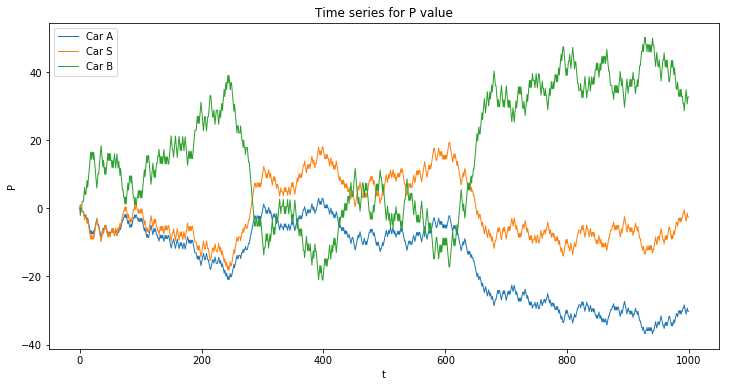

In [258]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.plot(P[0,:], linewidth=1.0)
ax.plot(P[1,:], linewidth=1.0)
ax.plot(P[2,:], linewidth=1.0)

ax.legend(['Car A', 'Car S', 'Car B'], loc='upper left')

ax.set_xlabel('t')
ax.set_ylabel('P')

ax.set_title('Time series for P value')

plt.show()